In [1]:
import pandas as pd 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


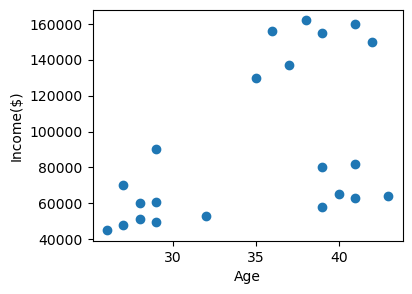

In [3]:
plt.figure(figsize=(4,3))
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [4]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])

df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [5]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

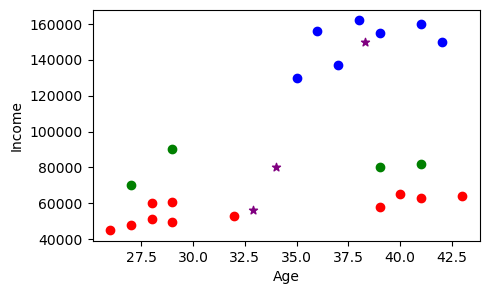

In [6]:
plt.figure(figsize=(5,3))
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'], color='green')
plt.scatter(df2['Age'],df2['Income($)'], color='blue')
plt.scatter(df3['Age'],df3['Income($)'], color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centriod')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [7]:
# scaling
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [8]:
kmeans = KMeans(n_clusters=3)
ypred=kmeans.fit_predict(df[['Age','Income($)']])
df['cluster']= ypred
kmeans.cluster_centers_ 

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

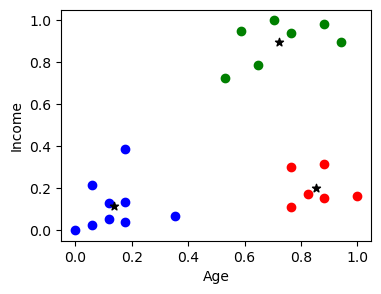

In [9]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
plt.figure(figsize=(4,3))
plt.scatter(df1['Age'],df1['Income($)'], color='green')
plt.scatter(df2['Age'],df2['Income($)'], color='blue')
plt.scatter(df3['Age'],df3['Income($)'], color='red')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centriod')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

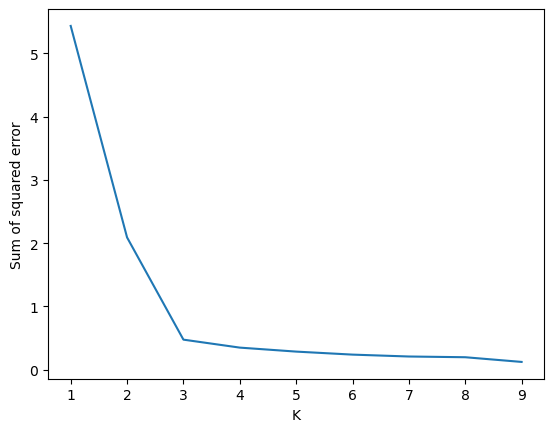

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)